# [Jupyter]전국 커피숍 규모 파악.ipynb
Description   : 전국 커피숍 규모에 대한 분석

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# data_coffee 경로 찾기 및 변경
os.chdir(r"C:\Users\TitusChoi\Desktop\Library\CodeLion\AI")

# data_coffee 데이터 불러오기, dataframe, encoding을 위해 engine='python' 활용
df = pd.read_csv('./datasets/data_coffee.csv', engine='python')

# data 수치 요약
df1 = df.loc[:, ['number','sizeOfsite']]
print(df1.head())
print(df1.shape)

   number  sizeOfsite
0       1       20.80
1       2      212.72
2       3       20.04
3       4       64.17
4       5       11.40
(46832, 2)


In [4]:
# 결측치 개수 파악
count = 0
for number in df1['sizeOfsite']:
    if number == 0:
        count += 1
print(count) # 0값 1341개

# 결측치 개수 파악
print(np.count_nonzero(df1.isnull())) # 결측치 19개

print("최소값 :", df1['sizeOfsite'].min()) # 최소값 0이 되는 형태 발생 -> 평균에 영향미침

1341
19
최소값 : 0.0


In [5]:
# 0을 nan 꼴로 변경
df1 = df1.replace(0, np.nan)

In [7]:
# 통계적 데이터 : skipna 사용해도 됨
df1['sizeOfsite'].describe()

count    45472.000000
mean        77.758473
std        136.432942
min          0.250000
25%         30.000000
50%         51.920000
75%         95.310000
max      24075.000000
Name: sizeOfsite, dtype: float64

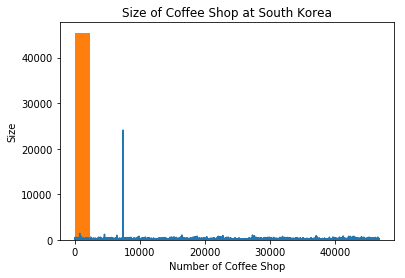

In [8]:
# 결측치 제거 데이터로 plotting
df2 = df1.dropna()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(
    df2['sizeOfsite']
       )
ax.hist(
    df2['sizeOfsite']
       )
ax.set_title('Size of Coffee Shop at South Korea')
ax.set_xlabel('Number of Coffee Shop')
ax.set_ylabel('Size')
plt.show()

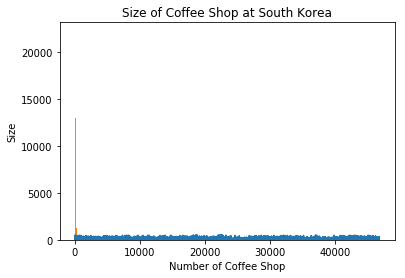

In [9]:
# 이상치 제거 데이터로 plotting : 500 이상 값 제거, 불린 추출 활용
df3 = df2[(df2['sizeOfsite'] < 500)]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(
    df3['sizeOfsite']
       )
ax.hist(
    df3['sizeOfsite']
       )
ax.set_title('Size of Coffee Shop at South Korea')
ax.set_xlabel('Number of Coffee Shop')
ax.set_ylabel('Size')
plt.show()

## 분석

히스토그램은 작은 값부터 빈도를 늘려가는 그래프로 막대그래프랑은 전혀 다르다.

1. 커피숍의 사이즈가 500 이하인 매점은 총 45360개이다.
2. 커피 전문 브랜드는 매장의 크기보다 내실있는 지점의 개수를 늘리는 것에 집중하고 있다.